In [11]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Load Data

In [2]:
data = pd.read_csv("1.01.+Simple+linear+regression.csv")
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### - SAT: Critical Reading + Mathematics + writing
#### - GPA: Grade point average

# Create first regression

#  y^ = b0 + b1 * x1

## Define the dependent and the independent variable

In [9]:
y = data["GPA"]
x1 = data["SAT"]

# Explore the data

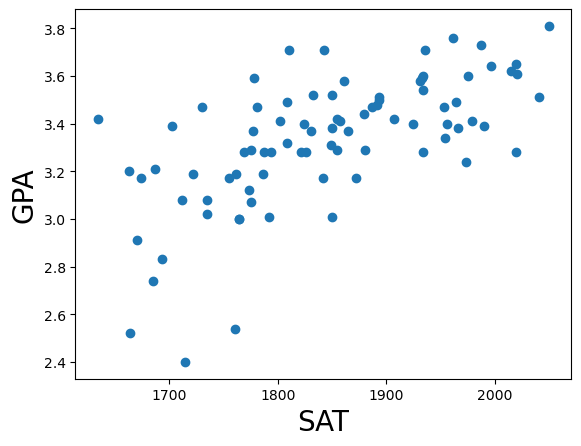

In [12]:
plt.scatter(x1, y)
plt.xlabel("SAT", fontsize = 20)
plt.ylabel("GPA", fontsize = 20)
plt.show()

#### - There is strong relationship between SAT and GPA

## Regression itself

In [17]:
x = sm.add_constant(x1)
x
# denklemde b0'ın yanında x0 olmadığı için onu 1 olarak aldık. üstteki kodla x0'ı belirledik

,const,SAT
0,1.0,1714
1,1.0,1664
2,1.0,1760
3,1.0,1685
4,1.0,1693
...,...,...
79,1.0,1936
80,1.0,1810
81,1.0,1987
82,1.0,1962


In [20]:
# OLS : ordinary least squares
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 06 Jul 2023   Prob (F-statistic):           7.20e-11
Time:                        17:27:56   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- ##  b0 = 0.2750 (const - coef) 
- ##  b1 = 0.0017 (sat - coef)
- ## std err is error. its better to as lower as possible 
- ## t : t-statistic
- ## OLS : Ordinary least squares. It detects the line that has minumum error (best fit the points in the graph)
- ## R-squared: SSR / SST (regression / total), measures how well your model fit your data
- ### R-squared = 0 : Your regression explains NONE of the variablity
- ### R-squared = 1 : Your regression explains ENTIRE of the variablity

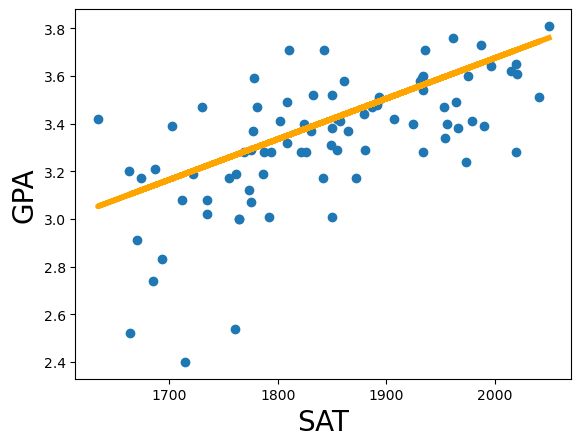

In [21]:
plt.scatter(x1, y)
yhat = 0.0017 * x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c="orange", label="regression line")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

- ## GPA = 0.275 + 0.0017 * SAT
- ## yhat = 0.275 + 0.0017 * 1700 = 3.165 (true) 

# Difference between Seaborn and Matplotlib graphics

In [25]:
sns.set()

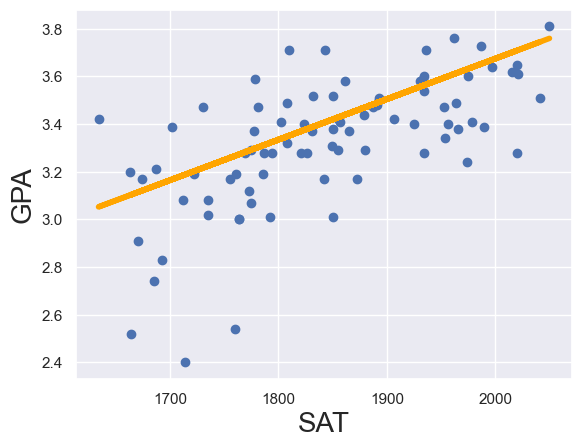

In [24]:
plt.scatter(x1, y)
yhat = 0.0017 * x1 + 0.275
fig = plt.plot(x1, yhat, lw=4, c="orange", label="regression line")
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.show()

# Different Example

In [27]:
data2 = pd.read_csv("real_estate_price_size.csv")
data2

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46
...,...,...
95,252460.400,549.80
96,310522.592,1037.44
97,383635.568,1504.75
98,225145.248,648.29


In [30]:
data2.describe()

,price,size
count,100.000000,100.000000
mean,292289.470160,853.024200
std,77051.727525,297.941951
min,154282.128000,479.750000
25%,234280.148000,643.330000
50%,280590.716000,696.405000
75%,335723.696000,1029.322500
max,500681.128000,1842.510000


In [29]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


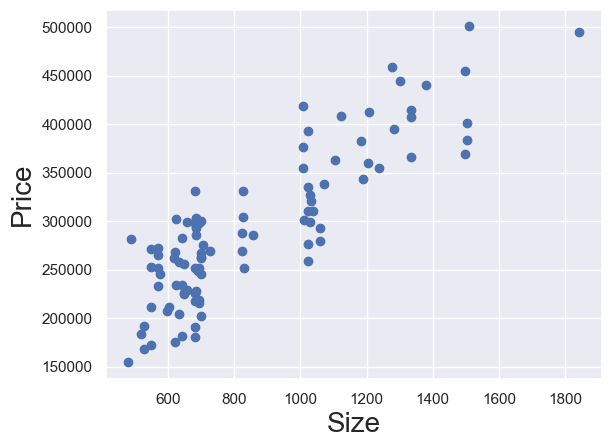

In [32]:
new_x1 = data2["size"]
new_y = data2["price"]
plt.scatter(new_x1, new_y)
plt.xlabel("Size", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()

In [33]:
new_x = sm.add_constant(new_x1)
new_x

,const,size
0,1.0,643.09
1,1.0,656.22
2,1.0,487.29
3,1.0,1504.75
4,1.0,1275.46
...,...,...
95,1.0,549.80
96,1.0,1037.44
97,1.0,1504.75
98,1.0,648.29


In [35]:
result = sm.OLS(new_y, new_x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     285.9
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           8.13e-31
Time:                        11:54:24   Log-Likelihood:                -1198.3
No. Observations:                 100   AIC:                             2401.
Df Residuals:                      98   BIC:                             2406.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.019e+05   1.19e+04      8.550      0.000    7.83e+04    1.26e+05
size         223.1787     13.199     16.909      0.000     196.986     249.371
==============================================================================
Omnibus:                        6.262   Durbin-Watson:                   2.267
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.938
Skew:                           0.117   Prob(JB):                        0.230
Kurtosis:                       2.194   Cond. No.                     2.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

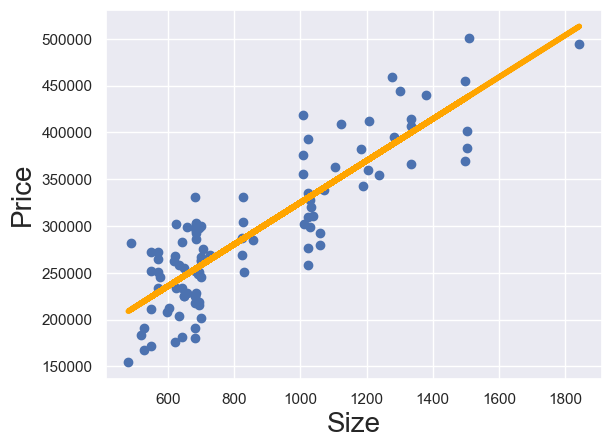

In [36]:
plt.scatter(new_x1, new_y)
yhat = new_x1 * 223.1787 + 101900
fig = plt.plot(new_x1, yhat, lw=4, c="orange", label="regression line")
plt.xlabel("Size", fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()